# Breast Cancer Detection usind Images Dataset 

## Introduction

In this Project, a set of 572 **Pathological slices** images of Breast Cancer taken by a Microscope in **RGB** colors is used to develope a Neural Network Model to Detect the Brest Cancer.

In this assignment 2 model types with Binary(Cancer,Normal) Output been Developed based on the same Dataset : 
1. MLP Classification model. 
2. Keras Classification Model.

outputs : 
(0) for Normal.
(1) for Cancer.
<p> **more detailes Explained in the Report.</p>

## Data Set Pre-Processing :

In [1]:
import numpy as np 
import os 
import cv2 

In [127]:
imgDir = "F:/CancerImages/New_Cancer/" # Data Location in my PC
Categories = ["Normal","Cancer"]   # 2 Classes (Categories)

training_data = []  

#This Function imports images from subfolders and resize it into 50x50 RGB images, and save it as numerical Arrays.
def Create_training_data() : 
    for category in Categories :
        class_num=Categories.index(category) # Classification will be 0 and 1 instead of Cancer and Normal. 
        path = os.path.join(imgDir,category)
        for img in os.listdir(path):
            img_Array= cv2.imread(os.path.join(path,img)) # importing images in RGB channel.  
            #new_Array = cv2.resize(img_Array,(50,50)) # since all the images are already 50x50 there is no need to that.
            training_data.append([img_Array , class_num])

    
Create_training_data()
print("Dataset length: ",len(training_data), "images.")

Dataset length:  572 images.


**Next Step will be about mixing All data Randomly then Storing them into .NPY Files to use it Later.**

In [128]:
import random 
random.shuffle(training_data) # this mix all Data Randomly to avoid Overfitting .

x=[]
y=[]
for features,label in training_data:    # Features is the image values , Label is the Category(0 and 1)
    x.append(features)
    y.append(label)

In [129]:
# Converting Arrays to numpy arrays and saving it as NPY files. 

x=np.array(x)
y=np.array(y)

print(x.shape)
print(y.shape)
np.save("BC_X",x) # Images Data.
np.save("BC_Y",y) # Categories (Targets).

(572, 50, 50, 3)
(572,)


**The data is Ready to be used in the Classification models**

## 1. MLP Classification 

### 1.1. Building The Model

In [16]:
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import sklearn.metrics as metrics 
import seaborn as sns

In [130]:
x=np.load("BC_X.npy") # Images Data stored before. 
y=np.load("BC_Y.npy")

n_images, nx,ny,nz = x.shape 

x=x.reshape(n_images, nx*ny*nz)/255 # Reshaping arrays to be fitted into MLP Classifire. (deviding by 255 for normalization)
print(x.shape)
print(y.shape)

(572, 7500)
(572,)


In [41]:
# Splitting The Dataset into Training and  Testing Subsets. 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=1)

In [107]:
# Creating MLP model with a hidden layer size 80x50 

mlpc = MLPClassifier( random_state=1, solver="adam", activation="relu",hidden_layer_sizes=(80,50),max_iter=1000)
mlpc.fit(x_train,y_train)
print("score:", mlpc.score(x_test,y_test))

score: 0.5930232558139535


Accuracy:  0.5930232558139535


<AxesSubplot:>

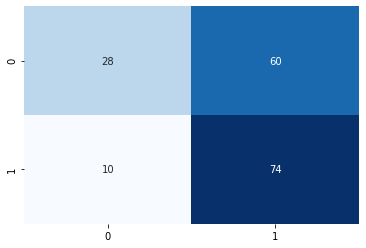

In [109]:
y_pred = mlpc.predict(x_test)
acc= metrics.accuracy_score(y_test,y_pred)

print("==============================")
print("Accuracy: ", acc)
print("==============================")

cm= metrics.confusion_matrix(y_test,y_pred)

sns.heatmap(cm, annot=True,cbar=False, cmap="Blues",fmt="")

### 1.2. Grid Search (To choose the best Parameters for the model)

In [50]:
from sklearn.model_selection import GridSearchCV

In [94]:
# a list of defferent parameters. 


mlpc_params={
             "activation":["relu","tanh"],
             "hidden_layer_sizes":[(50,80),(80,50),(100,)],
             "solver":["adam","sgd"]}

mlpc = MLPClassifier(random_state=1,max_iter=1000) # Max iteration commmand used Because on 200 iterations my PC gives error
mlpc_multiple=GridSearchCV(mlpc,mlpc_params,cv=3,n_jobs=-1,verbose=2) 
mlpc_multiple.fit(x_train,y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  9.4min finished


GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=1000, random_state=1),
             n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh'],
                         'hidden_layer_sizes': [(50, 80), (80, 50), (100,)],
                         'solver': ['adam', 'sgd']},
             verbose=2)

In [96]:
print ("Best Parameters : ",mlpc_multiple.best_params_) # showing the best Parameters

Best Parameters :  {'activation': 'tanh', 'hidden_layer_sizes': (80, 50), 'solver': 'sgd'}


**New Model using best parameters :**

In [108]:
mlpc_enhanced = MLPClassifier(random_state=1,activation="relu",hidden_layer_sizes=(80,50), solver="sgd",max_iter=1000)
mlpc_enhanced.fit(x_train,y_train)


print("==============================")
print("score:",mlpc_enhanced.score(x_test,y_test))
print("==============================")

score: 0.627906976744186


Score increased to 62%

### 1.3. Confusion Matrix and F1 Score

In [60]:
import matplotlib.pyplot as plt 
import sklearn.metrics  as metrics
import seaborn as sns

**Confusion matrix :**

Accuracy:  0.627906976744186


<AxesSubplot:>

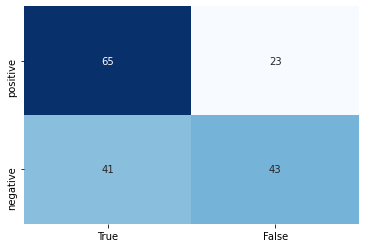

In [110]:
# predicting Test Data 

y_pred = mlpc_enhanced.predict(x_test)
acc= metrics.accuracy_score(y_test,y_pred)

print("==============================")
print("Accuracy: ", acc)
print("==============================")

cm= metrics.confusion_matrix(y_test,y_pred)
#print(cm)
y_class=["positive", "negative"]
x_class=["True","False"]
sns.heatmap(cm, annot=True,cbar=False, cmap="Blues",fmt="",xticklabels=x_class,yticklabels=y_class)


**F1 Score, and Classification Report :**

In [111]:
f1=metrics.f1_score(y_test,y_pred)
cr= metrics.classification_report(y_test,y_pred) # Classification Report. 
print("==============================")
print("F1 Score : ", f1)
print("==============================")
print("Classification Report : \n",cr)
print("==============================")

F1 Score :  0.5733333333333334
Classification Report : 
               precision    recall  f1-score   support

           0       0.61      0.74      0.67        88
           1       0.65      0.51      0.57        84

    accuracy                           0.63       172
   macro avg       0.63      0.63      0.62       172
weighted avg       0.63      0.63      0.62       172



<hr>

### 1.4. AUC AND ROC 

In [112]:
# Calculating ROC and AUC 

probs=mlpc_enhanced.predict_proba(x_test)

probs=probs[:,1]
fpr,tpr,threshold=metrics.roc_curve(y_test,y_pred)
auc_value =metrics.auc(fpr,tpr)

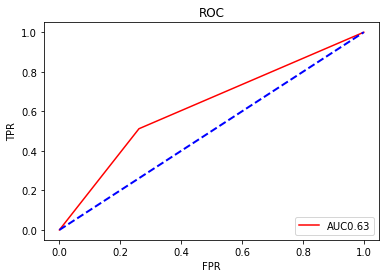

In [113]:
# Plotting Curves : 

plt.title("ROC")
plt.plot(fpr,tpr,label="AUC" + str(round(auc_value,2)),color="red" )
plt.plot([0,1],[0,1],color="blue",lw=2,linestyle="--")
plt.legend(loc="lower right")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

### 4.5. K-Fold Cross Validation

In [114]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import pandas as pd 

In [79]:
# This Can show how can model result changes when the dataset changes. 

Knn = KNeighborsClassifier(n_neighbors=5)

scores= cross_val_score(estimator=Knn,X=x, y=y, cv=3)
i=1 
for score in scores:
    print("the {}. Score :".format(i),score)
    i=i+1 

print("Average: ", np.mean(scores))

the 1. Score : 0.5287958115183246
the 2. Score : 0.5340314136125655
the 3. Score : 0.5157894736842106
Average:  0.5262055662717001


<hr>

### Result Conclusion

In first model a random Parameters were chosen to train the model has reached an accuracy of about 59 %, after that GridSearchCV Function used to choose the best parameters between 36 fits, the process took about 10 minutes to apply all of 36 Combinations. After that there were a new Good parameters, when they used to make an enhanced model they resulted accuracy about 62 %, it is relative good accuracy.

By looking to the Confusion matrix we Realize the there is a relative high (False Negative) rate, it is cause by the dataset. And finally, in Medical Field, a model in this Accuracy can't be used because it has a relative low Accuracy or be used in medical Field. This model can be enhanced by using Larger Dataset with much details. 

<hr>

## 2. Keras Classifire 

### 2.1. Building The model

#### 2.1.1. Importing Data

In [121]:
import numpy as np 
import matplotlib.pyplot as plt 
import os 
import cv2 
from sklearn.model_selection import train_test_split

In [150]:
# Loading .NPY Files.  
x=np.load("BC_X.npy")
y=np.load("BC_Y.npy")
#x=x/255                 # Normalized RGB.
print(x.shape)
print(y.shape)

(572, 50, 50, 3)
(572,)


In [151]:
# Splitting Dataset into Train and test subsets. 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=1) # Test group will be 20% of samples

In [152]:
# input shape will be used in the model 
input_shape = x_train.shape[1:]
print(input_shape)

print(x_test.shape)
print(y_test.shape)

(50, 50, 3)
(115, 50, 50, 3)
(115,)


#### 2.1.2. Building Process

In [153]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, Dropout , Flatten , MaxPool2D, BatchNormalization

In [217]:
# Adding Parameters to the model. 
model = Sequential()
model.add(Conv2D(16, kernel_size=3, activation="relu", padding="Same", input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(32, kernel_size=3, activation="relu", padding="Same"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(64, kernel_size=3, activation="relu", padding="Same"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(128, kernel_size=3, activation="relu", padding="Same"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(256, kernel_size=3, activation="relu", padding="Same"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dense(2,activation="softmax"))

In [226]:
# Compiling the Model. 

model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

# fitting Data. 

my_model= model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
15/15 [==============================] - 2s 120ms/step - loss: 0.3446 - accuracy: 0.8731 - val_loss: 1.4735 - val_accuracy: 0.5913
Epoch 2/10
15/15 [==============================] - 2s 107ms/step - loss: 0.3945 - accuracy: 0.8425 - val_loss: 0.8998 - val_accuracy: 0.7217
Epoch 3/10
15/15 [==============================] - 2s 107ms/step - loss: 0.2037 - accuracy: 0.9190 - val_loss: 1.6135 - val_accuracy: 0.5391
Epoch 4/10
15/15 [==============================] - 2s 107ms/step - loss: 0.1415 - accuracy: 0.9365 - val_loss: 0.8559 - val_accuracy: 0.6870
Epoch 5/10
15/15 [==============================] - 2s 113ms/step - loss: 0.0710 - accuracy: 0.9825 - val_loss: 2.1722 - val_accuracy: 0.5739
Epoch 6/10
15/15 [==============================] - 2s 109ms/step - loss: 0.0865 - accuracy: 0.9672 - val_loss: 0.8486 - val_accuracy: 0.6435
Epoch 7/10
15/15 [==============================] - 2s 110ms/step - loss: 0.0541 - accuracy: 0.9781 - val_loss: 1.0304 - val_accuracy: 0.7130
Epoch 

### 2.2. Evaluation of Keras Model Results 

In [227]:
import sklearn.metrics as metrics

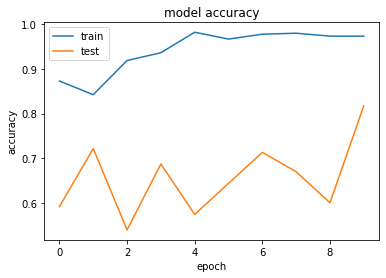

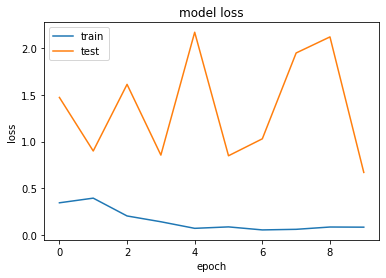

In [228]:
# Plotting Accuracy Values Showing how it changes while Epochs change.

acc = my_model.history['accuracy']
val_acc = my_model.history['val_accuracy']
loss = my_model.history['loss']
val_loss = my_model.history['val_loss']
#print("accuracy : ",acc)
#print("valalidation accuracy :", val_acc )
#print("Loss :", val_acc )
#print("valalidation loss :", val_loss )

# Plot Properties : 

# Accuracy plot 
plt.plot(acc)
plt.plot(val_acc)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# Loss plot
plt.plot(loss)
plt.plot(val_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<AxesSubplot:>

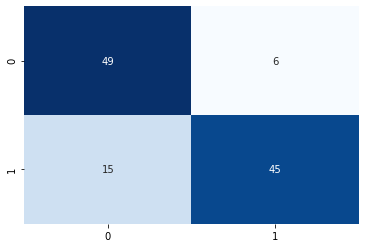

In [229]:
y_pred=model.predict(x_test)
cm = metrics.confusion_matrix(y_test,y_pred.round())
sns.heatmap(cm,annot=True, cbar=False , fmt="", cmap="Blues")

<hr>

### 2.3. Results and Conclusion

The Developed Keras Classification model achieved a good accuracy about 81% , that is relative acceptable result, but it must be improved by trying to re-Organize the Dataset and changing the Model Structure. , by using a larger Dataset, Accuracy can go up to 98% or 99% and that is suitable to be used in medical field.